# Assignment: Digit Recogintion by Multinominal Logistic Regression

We have see one example about how to use multinominal logistic regression model to do digit recognition. In that example, the dataset we used is loaded from `sklearn.datasets.load_digits`. In the end we trained a multinominal logistic regression model with 95% accuracy.

Actually the digit dataset contained in sklearn is too small to be representative of a real world machine learning task. MNIST dataset is for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

In this homework, please apply the multinominal logistic regression model on the MNIST dataset. You need to finish the following things:

1. Split the data set into training and testing parts with ratio 70:30.
2. Setup a multinominal logistic regression model by `sklearn` and fit it using training data.
3. Calculate the confusion matrix, precision and recall on testing data.

In [12]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

digits = np.load('mnist.npz')

In [13]:
digits.files

['x_test', 'x_train', 'y_train', 'y_test']

In [35]:
x_train = digits['x_train'].reshape((-1,28*28))
y_train = digits['y_train']
x_test = digits['x_test'].reshape((-1,28*28))
y_test = digits['y_test']

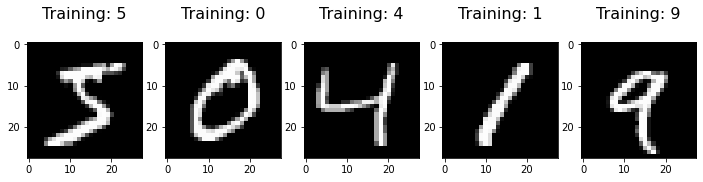

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,4))
for index in range(5):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(x_train[index], (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % y_train[index], fontsize = 16)

In [32]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(x_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
y_test_pred = logistic.predict(x_test)

from sklearn.metrics import confusion_matrix

print ('Confusion matrix on testing set:\n', confusion_matrix(y_test, y_test_pred))

Confusion matrix on testing set:
 [[ 963    0    0    3    1    3    4    4    2    0]
 [   0 1112    4    2    0    1    3    2   11    0]
 [   3   10  926   15    6    4   15    8   42    3]
 [   4    1   21  916    1   26    3    9   22    7]
 [   1    1    7    3  910    0    9    7   10   34]
 [  11    2    1   33   11  776   11    6   35    6]
 [   9    3    7    3    7   16  910    2    1    0]
 [   1    6   24    5    7    1    0  951    3   30]
 [   8    7    6   23    6   26   10   10  869    9]
 [   9    7    0   11   25    6    0   22    7  922]]


In [40]:
from sklearn.metrics import classification_report

print ('On testing set:\n', classification_report(y_test, y_test_pred))

On testing set:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.93      0.93      0.93       982
           5       0.90      0.87      0.89       892
           6       0.94      0.95      0.95       958
           7       0.93      0.93      0.93      1028
           8       0.87      0.89      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000

